<a href="https://colab.research.google.com/github/bluezdot/ShopeeImage/blob/main/ShopeeImageEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

## Import

In [4]:
!git clone https://github.com/bluezdot/ShopeeImage.git

fatal: destination path 'ShopeeImage' already exists and is not an empty directory.


In [5]:
%cd ShopeeImage/dataset/data_use

/content/ShopeeImage/dataset/data_use


In [6]:
import os
import random
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [7]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
sample_submission_df = pd.read_csv('./sample_submission.csv')

## Show some example of images

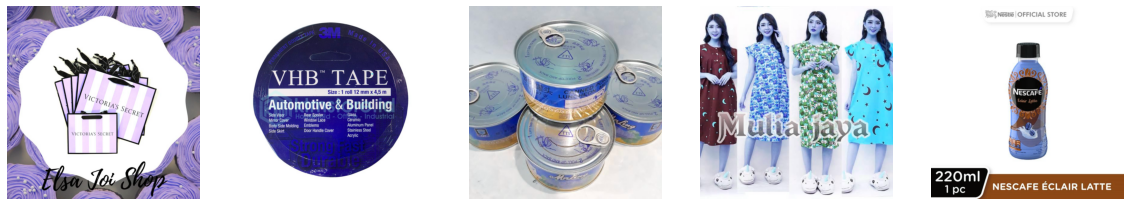

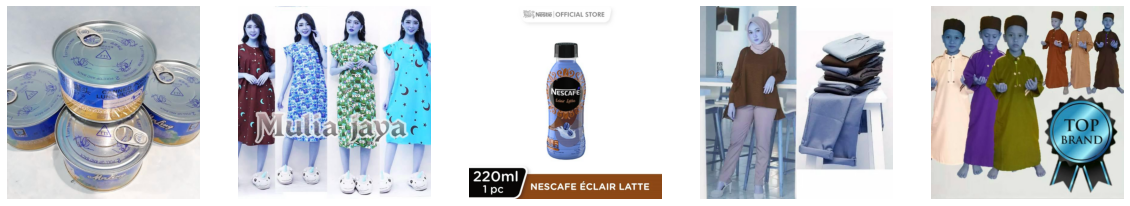

In [8]:
path = './train_images/'
for i in range(2):
    plt.figure(figsize=(20,5))
    for j in range(5):
        img = 2*i+j
        name = train_df.iloc[img, 1]
        title = ""
        plt.subplot(1,5,j+1)
        plt.title(title)
        plt.axis('off')
        plt.imshow(cv2.imread(path + name))

## Check for null - values

In [9]:
print("------TEST--------")
test_df.info()

print('\n')
print("------SAMPLE SUBMISSION--------")
sample_submission_df.info()

print('\n')
print("------TRAIN--------")
train_df.info()

------TEST--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   3 non-null      object
 1   image        3 non-null      object
 2   image_phash  3 non-null      object
 3   title        3 non-null      object
dtypes: object(4)
memory usage: 224.0+ bytes


------SAMPLE SUBMISSION--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   posting_id  3 non-null      object
 1   matches     3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


------TRAIN--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  objec

## Check for duplicated value

-.- Here we check for duplicated images. \
-.- Images have the same p-hash => duplication (delete in preprocessing stage)

In [10]:
for col in train_df.columns:
    duplicated = len(train_df[col]) - train_df[col].nunique() # duplicated rows = all rows - unique rows
    if duplicated > 0:
        print(f"'{col}' contains duplicated values. Number of duplicate: {duplicated}")

'image' contains duplicated values. Number of duplicate: 1838
'image_phash' contains duplicated values. Number of duplicate: 5515
'title' contains duplicated values. Number of duplicate: 1133
'label_group' contains duplicated values. Number of duplicate: 23236


## Visualize group distribution

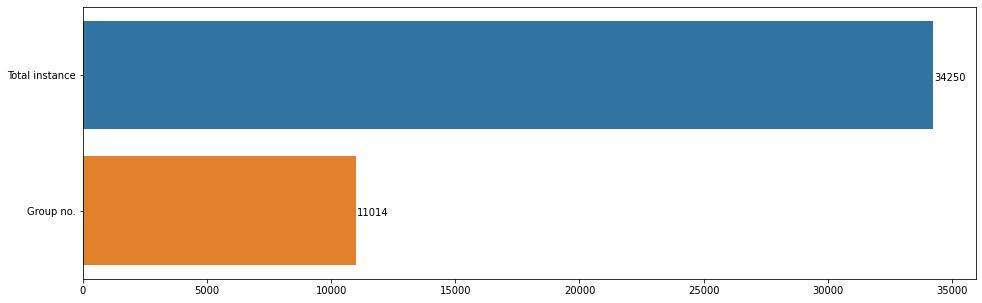

In [11]:
fig = plt.figure(figsize = (16,5))
s = sns.barplot(y = ["Total instance", "Group no."], x = [train_df.shape[0], train_df.label_group.nunique()], orient = 'h')
for p in s.patches:
    plt.text(x = p.get_width() + 30, y = p.get_y() + 0.55 * p.get_height(), s = f'{int(p.get_width())}')

In [12]:
label_df = train_df.groupby('label_group')['posting_id'].describe()
label_df.sort_values('count', ascending=False)

,count,unique,top,freq
label_group,,,,
1163569239,51,51,train_2624032383,1
159351600,51,51,train_2840508723,1
994676122,51,51,train_118604281,1
3113678103,51,51,train_2494367387,1
3627744656,51,51,train_1446216827,1
...,...,...,...,...
2357508171,2,2,train_2451758778,1
2357372960,2,2,train_4027901160,1
2357221297,2,2,train_3990013621,1


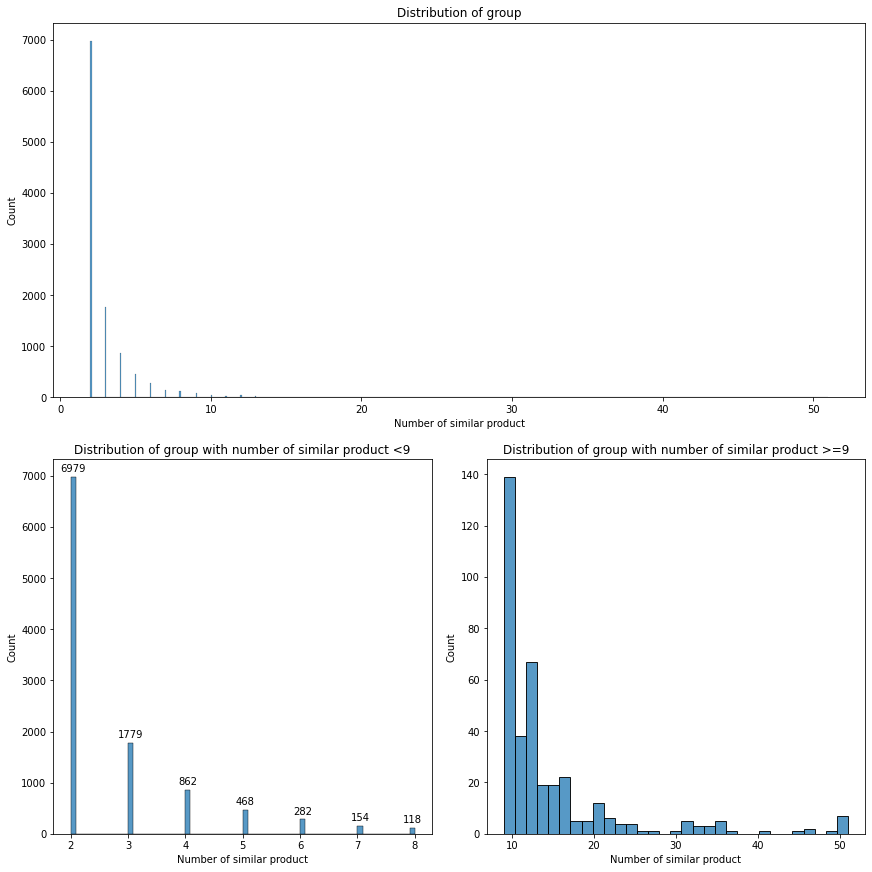

In [13]:
fig = plt.figure(constrained_layout = True, figsize = (12,12))
gs = fig.add_gridspec(2, 2)
ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])

sns.histplot(data=label_df,x='count',ax=ax0)
sns.histplot(data=label_df[label_df['count']<9],x='count',ax=ax1)
sns.histplot(data=label_df[label_df['count']>=9],x='count',ax=ax2)
ax0.set_title("Distribution of group")
ax1.set_title("Distribution of group with number of similar product <9")
ax2.set_title("Distribution of group with number of similar product >=9")
ax0.set_xlabel("Number of similar product")
ax1.set_xlabel("Number of similar product")
ax2.set_xlabel("Number of similar product")
for p in ax1.patches:
    if p.get_height() != 0:
        ax1.annotate(int(p.get_height()), 
                    xy = (p.get_x() + p.get_width() /2, p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 8), 
                    textcoords = 'offset points')

## Visualize width and height distribution

In [14]:
train_df['img_path'] = "./train_images/" + train_df.image
test_df['img_path'] = "./test_images/" + test_df.image
train_df['img_shape'] = train_df['img_path'].progress_apply(lambda x: np.shape(cv2.imread(x)))
test_df['img_shape'] = test_df['img_path'].progress_apply(lambda x: np.shape(cv2.imread(x)))

  0%|          | 0/34250 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [15]:
train_df['height']=[r[0] for r in train_df.img_shape]
train_df['width']=[r[1] for r in train_df.img_shape]
train_df.head()

,posting_id,image,image_phash,title,label_group,img_path,img_shape,height,width
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,./train_images/0000a68812bc7e98c42888dfb1c07da...,"(1024, 1024, 3)",1024,1024
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,./train_images/00039780dfc94d01db8676fe789ecd0...,"(1000, 1000, 3)",1000,1000
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,./train_images/000a190fdd715a2a36faed16e2c65df...,"(640, 640, 3)",640,640
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,./train_images/00117e4fc239b1b641ff08340b42963...,"(640, 640, 3)",640,640
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,./train_images/00136d1cf4edede0203f32f05f66058...,"(756, 756, 3)",756,756


Text(0.5, 1.0, 'Image Shape Log-Scale Distribution')

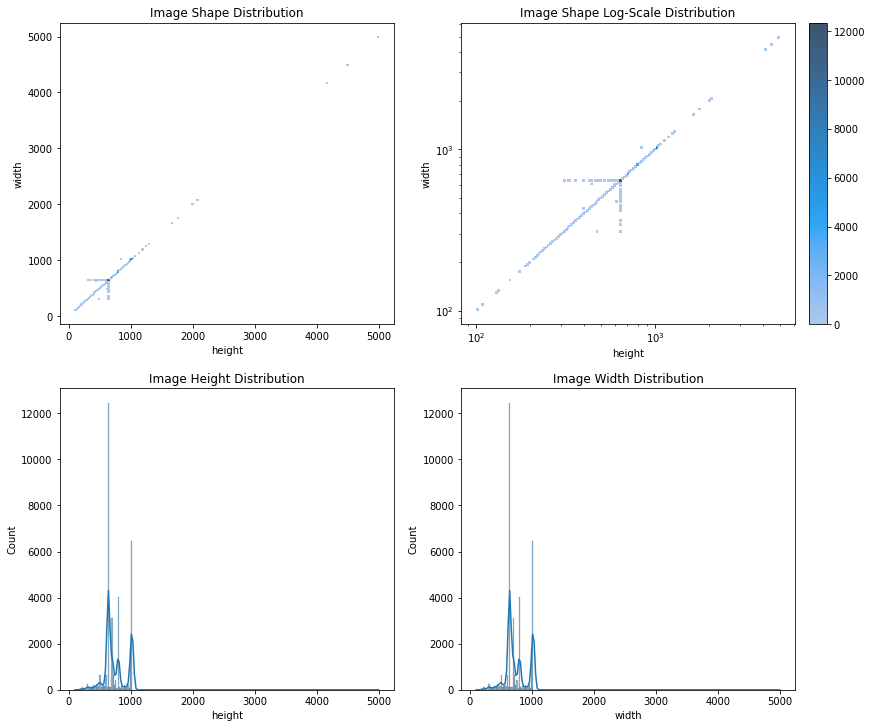

In [16]:
fig = plt.figure(constrained_layout=True,figsize=(12,10))
gs = fig.add_gridspec(2, 2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[0,1])

sns.histplot(data=train_df, x='height', kde=True, ax=ax1)
ax1.set_title('Image Height Distribution')
sns.histplot(data=train_df, x='width', kde=True, ax=ax2)
ax2.set_title('Image Width Distribution')
sns.histplot(data=train_df, x='height', y='width',ax=ax0)
ax0.set_title('Image Shape Distribution')
sns.histplot(data=train_df, x='height', y='width',ax=ax3,log_scale=(True,True),cbar=True)
ax3.set_title('Image Shape Log-Scale Distribution')

In [17]:
print('IMAGE WIDTH')
train_df.width.describe()

IMAGE WIDTH


count    34250.000000
mean       753.100175
std        189.337824
min        100.000000
25%        640.000000
50%        700.000000
75%        960.000000
max       5000.000000
Name: width, dtype: float64

In [18]:
print('IMAGE HEIGHT')
train_df.height.describe()

IMAGE HEIGHT


count    34250.000000
mean       753.110745
std        189.319626
min        100.000000
25%        640.000000
50%        700.000000
75%        960.000000
max       5000.000000
Name: height, dtype: float64

## Visualize some groups of products

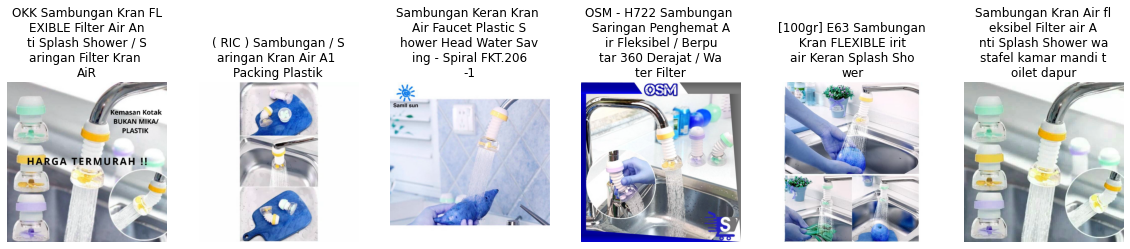

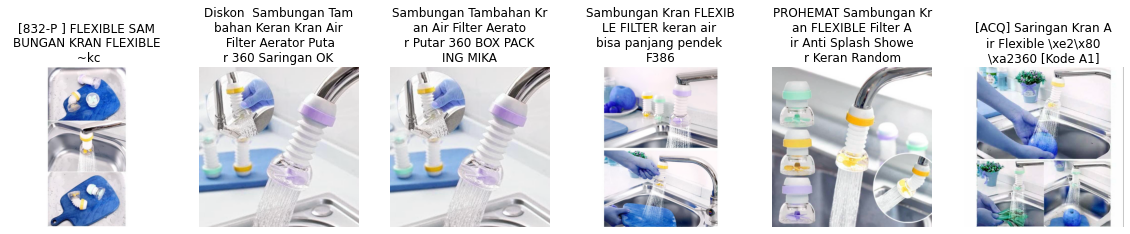

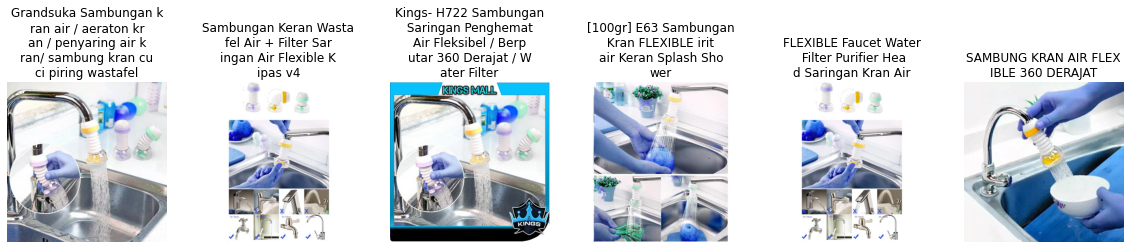

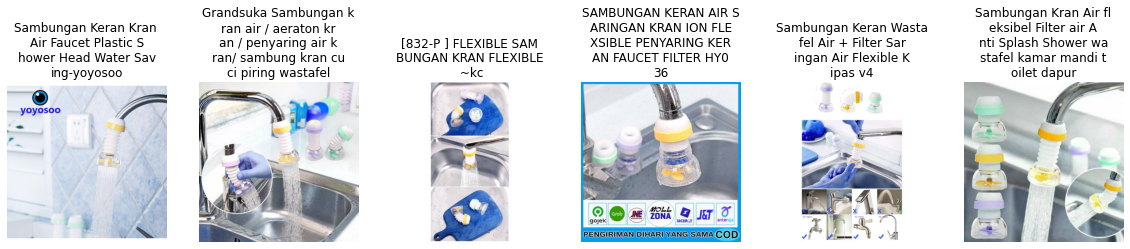

In [24]:
def display_images(df=train_df, random=False, COLS=6, ROWS=4, path='./train_images/'):
    for k in range(ROWS):
        plt.figure(figsize=(20,5))
        for j in range(COLS):
            if random: row = np.random.randint(0,len(df))
            else: row = COLS*k + j
            name = df.iloc[row,1]
            title = ""
            for i, chr in enumerate(df.iloc[row,3]):
                title += chr
                if (i!=0)&(i%20==0): title += '\n'
            plt.subplot(1,COLS,j+1)
            plt.title(title)
            plt.axis('off')
            plt.imshow(cv2.imread(path+name))
        plt.show()

display_images(df=train_df[train_df.label_group==3113678103], random=True)

We can see many identical images, so possibly their phash are the same

## Visualize p-hash distribution

In [25]:
phash_df = train_df.groupby('image_phash')['posting_id'].describe()
phash_df.sort_values('count', ascending = False)

,count,unique,top,freq
image_phash,,,,
fad28daa2ad05595,26,26,train_506533947,1
d0c0ea37bd9acce0,20,20,train_493140267,1
be12e12f9ec1e198,17,17,train_2058909989,1
e992966d4ba49761,16,16,train_876364696,1
f6d98134b904b56b,16,16,train_1226331500,1
...,...,...,...,...
b996c6cb9b82c266,1,1,train_2246439353,1
b996c6c5ce61c638,1,1,train_2913373542,1
b996c69992c7d330,1,1,train_3575721757,1


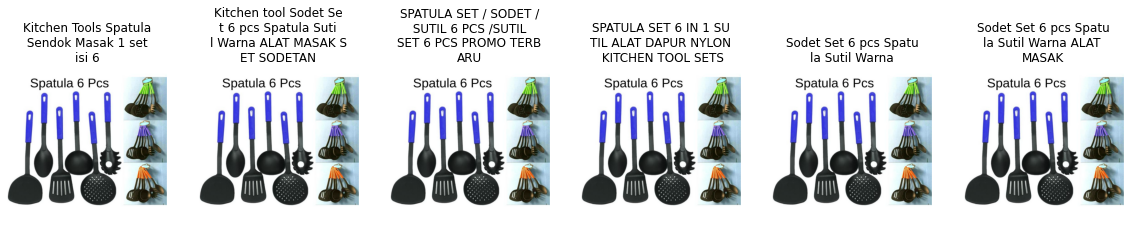

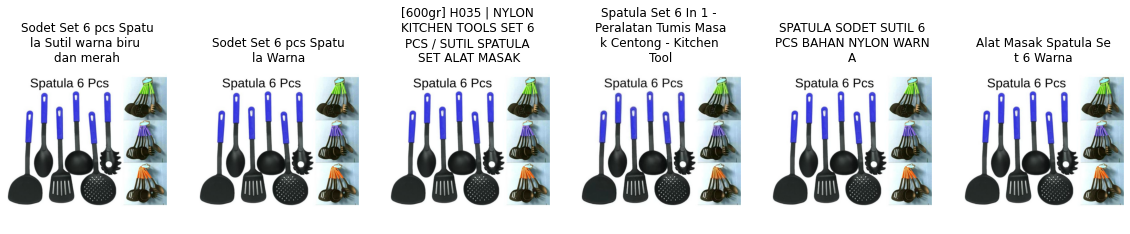

In [30]:
display_images(df=train_df[train_df.image_phash=='f6d98134b904b56b'], COLS=6, ROWS=2)

Same phash => exactly same image !!!

Text(0.5, 1.0, 'PHASH Distribution with number of images >= 10')

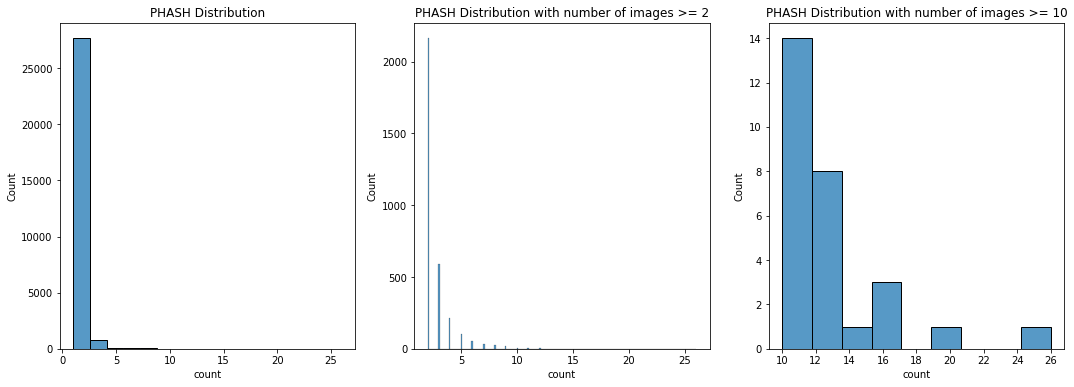

In [31]:
fig, axes = plt.subplots(1,3,figsize=(18,6))
sns.histplot(data=phash_df,x='count',ax=axes[0])
sns.histplot(data=phash_df[phash_df['count'] >= 2], x='count', ax=axes[1])
sns.histplot(data=phash_df[phash_df['count'] >= 10], x='count', ax=axes[2])
axes[0].set_title("PHASH Distribution")
axes[1].set_title("PHASH Distribution with number of images >= 2")
axes[2].set_title("PHASH Distribution with number of images >= 10")